# **魔方机器人的图像处理**
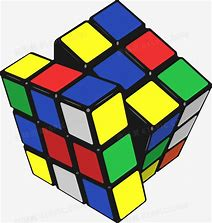

## 1.魔方还原处理流程
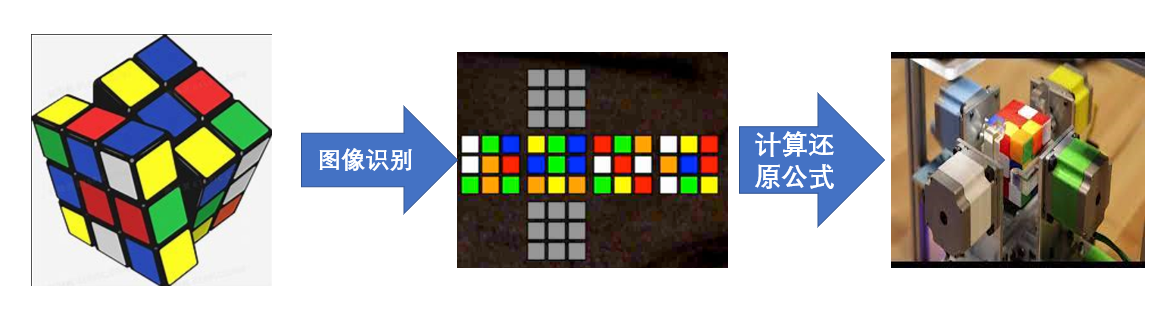

## 1.0视觉图像处理原理

### 1.0.0图像处理依赖库——OpenCV
**应用广泛**

应用在几乎所有图像领域中，例如图像处理、机器视觉、图像生成等。

**支持语言丰富**

基于Cpp开发，提供C、Python、JAVA等语言接口，支持多种开发框架。

In [1]:
#导入opencv库
import cv2

### 1.0.1图像即矩阵
**从灰度图说起**

In [2]:
cube0 = cv2.imread("cube2.png", 0) #将图片读取为灰度图形式
cv2.imshow("cube0", cube0) #显示魔方图案
cv2.waitKey(0)  
cv2.destroyWindow("cube0")

In [3]:
#显示灰度图片格式
print("shape=", cube0.shape)
print("type=", type(cube0))

shape= (315, 301)
type= <class 'numpy.ndarray'>


In [4]:
cv2.imshow("cube0", cube0[50:200, 50:200])
print(cube0[50:200, 50:200])
cv2.waitKey(0)
cv2.destroyWindow("cube0")

[[244 244 244 ...  21  21  28]
 [244 244 244 ...  21  21  21]
 [244 244 244 ...  21  21  34]
 ...
 [ 85  87  89 ...  28  28  28]
 [ 87  87  87 ...  28  28  28]
 [ 89  89  85 ...  28  28  28]]


**彩色图像就是表示不同颜色值的图像矩阵的叠加**

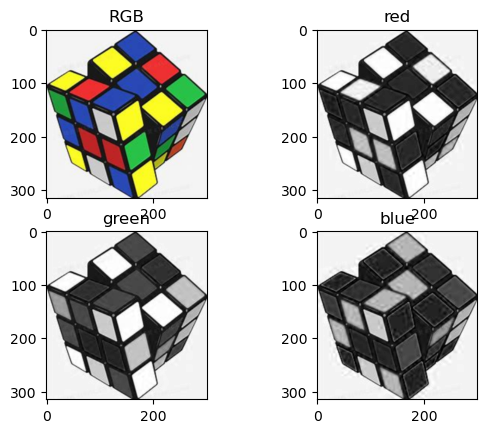

(315, 301, 3)
(315, 301)
(315, 301)
(315, 301)


In [5]:
import matplotlib.pyplot as plt
cube1 = cv2.imread("cube2.png") 
cube1_color = cv2.cvtColor(cube1, cv2.COLOR_BGR2RGB)
cube1_color_all = [cube1_color, cube1_color[:, :, 0], cube1_color[:, :, 1], cube1_color[:, :, 2]]
channels = ["RGB", "red", "green", "blue"]
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(cube1_color_all[i], cmap=plt.cm.gray)
    plt.title(channels[i])
plt.show()
for fruit in cube1_color_all:
    print(fruit.shape)

# 1.1视觉图像处理流程
$$ 视觉处理=>\left\{
\begin{matrix}
 形态检测 \\
 颜色检测 
\end{matrix}
\right.
$$
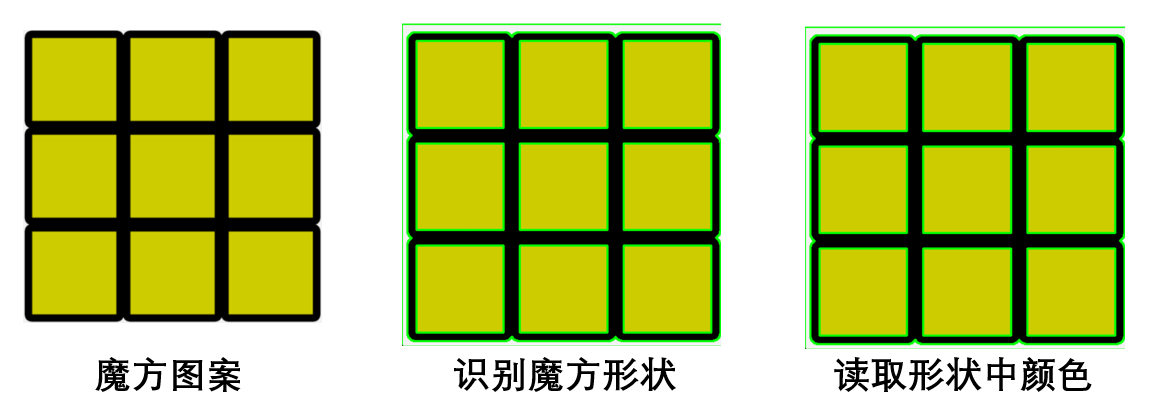

## 1.3图像处理方法(基于OpenCV-python)

### 1.3.1加载魔方原始图案(摄像头捕获)

In [6]:
img = cv2.imread("cube.png") #加载魔方图案
cv2.imshow("image", img) #显示魔方图案
cv2.waitKey(0) 
cv2.destroyWindow("image")

### 1.3.2进行魔方形态学处理

#### 1.3.2.1 图像二值化处理
 在数字图像处理中，二值图像占有非常重要的地位，图像的二值化使图像中数据量大为减少，从而能凸显出目标的轮廓。
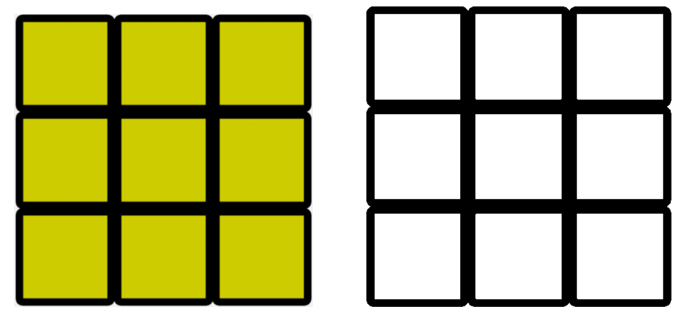

#### 1.3.2.2图像二值化处理原理

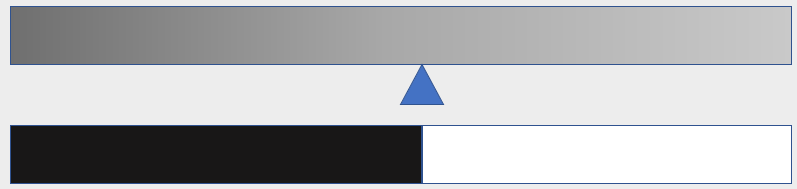

In [7]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow("img_gray", img_gray)
cv2.waitKey(0)
cv2.destroyWindow("img_gray")
ret, img_binary = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
cv2.imshow("img_binary", img_binary)
cv2.waitKey(0)
cv2.destroyWindow("img_binary")

#### 1.3.2.3轮廓检测
**cv2.findContours()**————找出图像中所有边界

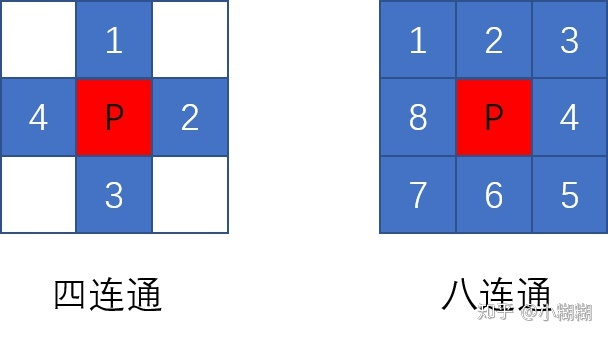

<font size=1>*Topological structural analysis of digitized binary images by border following</font>

In [8]:
contours, hierarchy = cv2.findContours(img_binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contours, -1, (0, 255, 0), thickness=2, lineType=None, hierarchy=None, maxLevel=None, offset=None)
cv2.imshow("hi", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 1.3.2.4 进行魔方矩形匹配


In [9]:
final_contours = []
for contour in contours:
    #进行多边形拟合
    perimeter = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.1 * perimeter, True)
    #计算边的数量为4的多边形
    if len (approx) == 4:
        area = cv2.contourArea(contour)#获取多边形面积
        (x, y, w, h) = cv2.boundingRect(approx)#获取拟合多边形的长款
        # Find aspect ratio of boundary rectangle around the countours.
        ratio = w / float(h)#计算长宽比
        # Check if contour is close to a square.
        if ratio >= 0.8 and ratio <= 1.2 and area / (w * h) > 0.9 and ((w * h)/(img.shape[0]*img.shape[1]))<0.1: #长宽比接近1并对大小进行限制
            final_contours.append([[x, y], [x, y+h] , [x+w, y+h], [x+w, y]])

# Return early if we didn't found 9 or more contours.
if len(final_contours) >= 9:
    print("get it!")
for final_contour in final_contours:
    print(final_contour)
    cv2.rectangle(img, final_contour[0], final_contour[2], (0, 0, 255), thickness=3)
cv2.imshow("cube", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

get it!
[[314, 313], [314, 437], [439, 437], [439, 313]]
[[167, 313], [167, 437], [292, 437], [292, 313]]
[[21, 313], [21, 437], [145, 437], [145, 313]]
[[314, 169], [314, 292], [439, 292], [439, 169]]
[[167, 169], [167, 292], [292, 292], [292, 169]]
[[21, 169], [21, 292], [145, 292], [145, 169]]
[[314, 24], [314, 148], [439, 148], [439, 24]]
[[167, 24], [167, 148], [292, 148], [292, 24]]
[[21, 24], [21, 148], [145, 148], [145, 24]]


### 1.2获取区域中的颜色
第一步是遍历该色块，把所有属于本色块的像素的颜色全部加起来，然后除以加起来的像素的数量，这样获得一个当前色块的平均颜色。

接下来我们可以提前设立很多阀值来判断一个色块的平均颜色到底属于什么颜色：

In [10]:
#比较宽泛的黄色的rgb范围是(200,200,0)到(255,255,0)
y_low = (200,200,0)
y_high = (255,255,0)


In [11]:
import numpy as np
cube_color_martix = np.zeros(9)

for i in range(len(final_contours)):
    (b, g, r) = img[int((final_contours[i][0][0]+final_contours[i][2][0])/2), int((final_contours[i][0][1]+final_contours[i][2][1])/2)]
    if (r, g, b)>y_low and (b, g, r)<y_high:
        cube_color_martix[i] = 1
cube_color_martix = cube_color_martix.reshape(3, 3)
print(cube_color_martix)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
